<a href="https://colab.research.google.com/github/willystw/fastai-learning/blob/dog-identification/dog-identification/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 33.1 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
     |████████████████████████████████| 186 kB 66.3 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 51 kB 242 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

In [3]:
# GPU required
torch.cuda.is_available()

False

Install Kaggle

In [4]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=fda03d407b0407965f8128eb1b120f6b778e3e844fcd9c1fc641d15f6002bdd4
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Upload kaggle.json manually

In [5]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-29 13:51:53          11391        942  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6943        523  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2690        200  1.0              
promptcloud/careerbuilder-job

In [6]:
!kaggle competitions download -c dog-breed-identification

 98% 679M/691M [00:05<00:00, 91.6MB/s]
100% 691M/691M [00:05<00:00, 122MB/s] 


In [7]:
!mkdir dog-breed
!unzip dog-breed-identification.zip -d dog-breed

Streaming output truncated to the last 5000 lines.
  inflating: dog-breed/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog-breed/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog-breed/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog-breed/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog-breed/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog-breed/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog-breed/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog-breed/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog-breed/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog-breed/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog-breed/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog-breed/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog-breed/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog-breed/train/840db91ba4600148f3dcb06ec419b421.jpg

In [8]:
df = pd.read_csv('dog-breed/labels.csv')
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [17]:
def get_x(r): return f"dog-breed/train/{r['id']}.jpg"
def get_y(r): return r['breed']

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x = get_x,
    get_y = get_y,
    splitter = RandomSplitter(seed=42),
    item_tfms = Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dls = dblock.dataloaders(df)

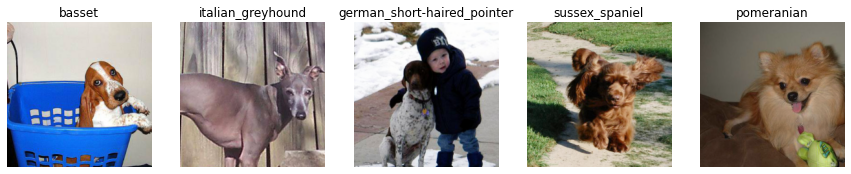

In [18]:
dls.show_batch(nrows=1, ncols=5)

In [12]:
dblock.summary(df)

Setting-up type transforms pipelines
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]
Found 10222 items
2 datasets of sizes 8178,2044
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipe

In [13]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=0.0006918309954926372)

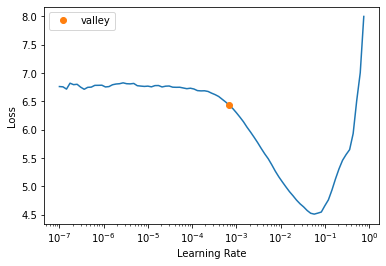

In [14]:
learn.lr_find()

In [15]:
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.693202,0.750017,0.212818,03:14


epoch,train_loss,valid_loss,error_rate,time
0,1.121398,0.811566,0.236791,04:12
1,0.679197,0.597266,0.184442,04:12


SuggestedLRs(valley=3.630780702224001e-05)

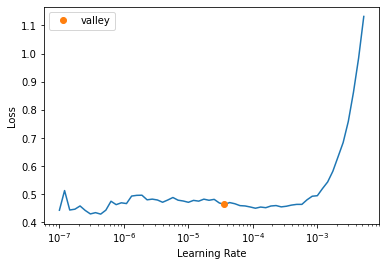

In [16]:
learn.lr_find()

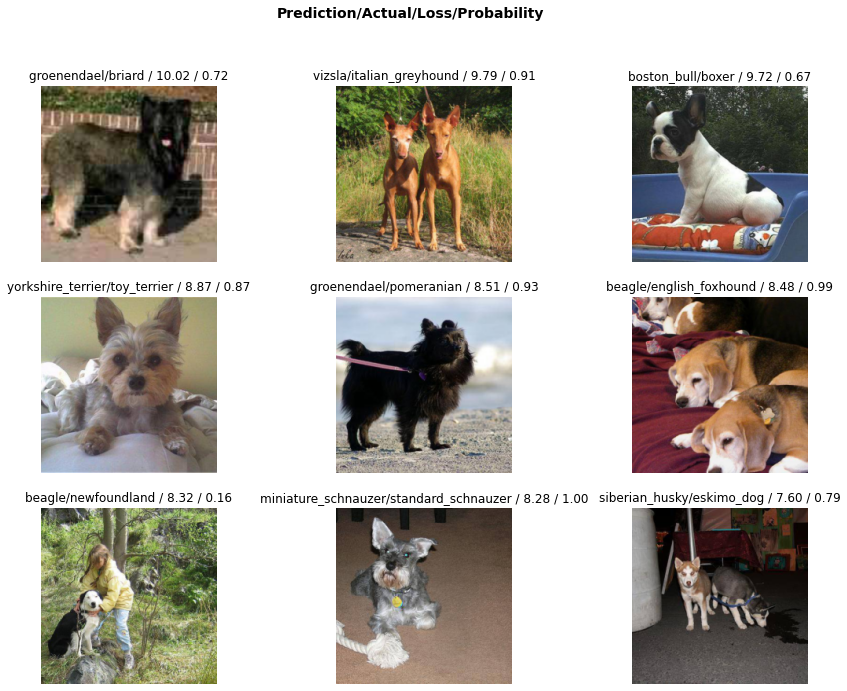

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_top_losses(9, figsize=(15,11))


In [21]:
learn.fine_tune(3, freeze_epochs=2, base_lr=2e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.447744,0.598383,0.182485,03:16
1,0.476813,0.583609,0.179550,03:16


epoch,train_loss,valid_loss,error_rate,time
0,0.442839,0.578015,0.174168,04:13
1,0.422718,0.565752,0.174168,04:12
2,0.420192,0.565575,0.177104,04:12


In [22]:
predictions = learn.get_preds(ds_type=DatasetType.Test)

NameError: ignored

In [24]:
learn.get_preds??

In [25]:
learn.predict??

In [26]:
test_df = pd.read_csv('dog-breed/sample_submission.csv')

In [27]:
submission_columns = data.classes.copy()
submission_columns.insert(0, 'id')
df = pd.DataFrame(columns=submission_columns)

NameError: ignored